# AUTOML 

## Insurance Company Premium
### Abstract

The dataset comprises information collected from customers of an insurance company, which includes their monthly income, the premiums paid by them within the time frame of 3-6 months and 6-12 months, and the total number of premiums paid. This information can be utilized to train a machine learning model that can predict whether premiums will be paid on time based on these factors. The resulting model can then be employed by the insurance company to enhance their services and improve the accuracy of premium payment predictions.

### The data set consists of :
1. id: Unique ID of the policy
2. perc_premium_paid_by_cash_credit: Percentage of premium amount paid by cash or credit card
3. age_in_days: Age in days of policy holder
4. Income: Monthly Income of policy holder
5. Count_3-6_months_late: No of premiums late by 3 to 6 months
6. Count_6-12_months_late: No of premiums late by 6 to 12 months
7. Count_more_than_12_months_late: No of premiums late by more than 12 months
8. application_underwriting_score: Underwriting Score of the applicant at the time of application (No applications under the score of 90 are insured)
9. no_of_premiums_paid: Total premiums paid on time till now
10. sourcing_channel: Sourcing channel for application
11. residence_area_type: Area type of Residence (Urban/Rural)
12. target: 1 - premium paid on time, 0 - otherwise





In [1]:
#installing dependencies
!pip install eli5
!pip install h2o 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=42ea34d0c6157b0ba6afe43d24823f9df2498e003703bdefb6337c8b53a570e9
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.7/177.7 MB 4.5 MB/s eta 0:00:00


In [2]:
#importing libraries
import h2o
from h2o.automl import H2OAutoML
from h2o.frame import H2OFrame
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#initializing h2o library
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmps33bayuv
  JVM stdout: /tmp/tmps33bayuv/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmps33bayuv/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_6hkpmb
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [3]:
#Loading the dataset
df = pd.read_csv('train.csv')

In [4]:
#Printing dataset to understand the columns and data types
df.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1


In [5]:
#Generating a statistical summary of the dataframe
df.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,target
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,10924.507533,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,9401.676542,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,1200.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,5400.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,7500.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,13800.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,60000.000000,1.000000


In [6]:
#To check the dataframe is loaded correctly
df.shape

(79853, 13)

In [7]:
#Checking for null values
df.isnull().sum()

#H2O imputes missing values with the mean (for numerical columns) or the mode (for categorical columns) of the corresponding column.
#Hence, no need to handle them separately

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
premium                                0
target                                 0
dtype: int64

Citing: https://insaid.medium.com/applying-automl-part-4-using-h2o-4814bed74efe#:~:text=H2O%20AutoML%20performs%20(simple)%20data,number%20of%20total%20models%20trained.

In [8]:
from sklearn.preprocessing import LabelEncoder

#Converting categorical columns to numerical for computation purpose
encoder = LabelEncoder()
df['sourcing_channel'] = encoder.fit_transform(df['sourcing_channel'])
df['residence_area_type'] = encoder.fit_transform(df['residence_area_type'])

In [9]:
#Checking values are encoded properly
df.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,2,1,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,0,1,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,2,0,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,0,1,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,1,1,9600,1


#AutoML

In [10]:
#Converting pandas df to h2o frame
h2o_frame = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Citng: https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/frame.html

In [11]:
#Converting target varibale to categorical, since the model performs better with categorical target values rather than binary
h2o_frame['target'] = (h2o_frame['target']==1).ifelse('Paid On Time', 'Not Paid On Time')

In [12]:
#Checking if the values are converted successfully
print(h2o_frame['target'])

target
Paid On Time
Paid On Time
Not Paid On Time
Paid On Time
Paid On Time
Paid On Time
Paid On Time
Not Paid On Time
Paid On Time
Not Paid On Time
[79853 rows x 1 column]



In [13]:
#splitting the frame into train and test
train_data, test_data = h2o_frame.split_frame(ratios=[0.8], seed = 1)

In [14]:
#Defining X (independent) and y (dependent) variables
y = 'target'

#Dropping 'id' column because it doesn't contribute significantly in model prediction
X_train = train_data.drop('id')
X_test = test_data.drop('id')

#Dropping the target variable from X
X_train = X_train.drop(y)
X_test = X_test.drop(y)

#Getting the column names of X_train, required for training automl
X=X_train.col_names

In [15]:
#Printing the column names for X and y to verify the data type is list/string
#H2o automl needs the name of columns in list or string format

print(f"Column names of X: {X}")
print(f'Data type of X: {type(X)}')

print("*"*150)
print(f"Column name of y: {y}")

Column names of X: ['perc_premium_paid_by_cash_credit', 'age_in_days', 'Income', 'Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late', 'application_underwriting_score', 'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type', 'premium']
Data type of X: <class 'list'>
******************************************************************************************************************************************************
Column name of y: target


In [16]:
print("*"*125," Train Data ","*"*125)
print(X_train)
print("*"*125," Test Data ","*"*125)
print(X_test)

*****************************************************************************************************************************  Train Data  *****************************************************************************************************************************
  perc_premium_paid_by_cash_credit    age_in_days    Income    Count_3-6_months_late    Count_6-12_months_late    Count_more_than_12_months_late    application_underwriting_score    no_of_premiums_paid    sourcing_channel    residence_area_type    premium
                             0.429          12058    355060                        0                         0                                 0                             99.02                     13                   2                      1       3300
                             0.01           21546    315150                        0                         0                                 0                             99.89                     21                   0  

# AUTO ML IMPLEMENTATION

The Automatic Machine Learning (AutoML) function automates the supervised machine learning model training process. AutoML finds the best model, given a training frame and response, and returns an H2OAutoML object



*   **max_models:** This parameter sets the maximum number of models that AutoML is allowed to build for the given dataset. In this case, the value is set to 10, which means that AutoML will build up to 10 models.
*   **seed:** This parameter sets the random seed for the AutoML process, which ensures that the results are reproducible.
*   **verbosity:** This parameter sets the level of detail in the log messages generated during the AutoML process. In this case, the verbosity is set to "debug", which provides the most detailed logging.
* **nfolds:** This parameter sets the number of cross-validation folds to use during the AutoML process. A value of 0 means that no cross-validation is performed, and the models are trained on the entire dataset.

Citing: https://docs.h2o.ai/h2o/latest-stable/h2o-r/docs/reference/h2o.automl.html

In [17]:
aml = H2OAutoML(max_models=10,seed=10,verbosity="debug",nfolds=0)
aml.train(x=X, y=y, training_frame=train_data)

AutoML progress: |
03:24:31.282: Project: AutoML_1_20230301_32431
03:24:31.283: Cross-validation disabled by user: no fold column nor nfolds > 1.
03:24:31.284: Setting stopping tolerance adaptively based on the training frame: 0.003958293475717756
03:24:31.284: Build control seed: 10
03:24:31.301: Since cross-validation is disabled, and validation frame(s) were not provided, automatically split the training data into training, validation frame(s) in the ratio 90/10/0.
03:24:32.14: training frame: Frame key: AutoML_1_20230301_32431_training_py_4_sid_92e8    cols: 13    rows: 57302  chunks: 2    size: 1816054  checksum: -4007757903571044485
03:24:32.40: validation frame: Frame key: AutoML_1_20230301_32431_validation_py_4_sid_92e8    cols: 13    rows: 6522  chunks: 2    size: 209226  checksum: -1255664364495411801
03:24:32.41: leaderboard frame: Frame key: AutoML_1_20230301_32431_validation_py_4_sid_92e8    cols: 13    rows: 6522  chunks: 2    size: 209226  checksum: -1255664364495411801


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_1_20230301_32431


Model Summary: 
    number_of_trees
--  -----------------
    45

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.0433954785058078
RMSE: 0.20831581434400942
LogLoss: 0.1607323272880633
Mean Per-Class Error: 0.3853701546293429
AUC: 0.8775026792482257
AUCPR: 0.9893611880498727
Gini: 0.7550053584964513

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5296824760735035
                  Not Paid On Time    Paid On Time    Error    Rate
----------------  ------------------  --------------  -------  ----------------
Not Paid On Time  839                 2717            0.7641   (2717.0/3556.0)
Paid On Time      359                 53387           0.0067   (359.0/53746.0)
Total             1198                56104           0.0537   (3076.0/57302.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.529682     0.971998  306
max f2                       0.279437     0.987511  367
max f0point5                 0.797156     0.964576  208
max accuracy                 0.547598     0.946354  300
max precision                0.997523     1         0
max recall                   0.150414     1         390
max specificity              0.997523     1         0
max absolute_mcc             0.732356     0.432657  236
max min_per_class_accuracy   0.938215     0.792617  104
max mean_per_class_accuracy  0.929043     0.794086  115
max tns                      0.997523     3556      0
max fns                      0.997523     53550     0
max fps                      0.0565855    3556      399
max tps                      0.150414     53746     390
max tnr                      0.997523     1         0
max fnr                      0.997523     0.996353  0
max fpr                      0.0565855    1         399
max tpr                      0.150414     1         390

Gains/Lift Table: Avg response rate: 93.79 %, avg score: 93.77 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100171                   0.996796           1.06616   1.06616            1                0.997196  1                           0.997196            0.0106799       0.0106799                  6.61631   6.61631            0.0106799
2        0.0200168                   0.996307           1.0643    1.06523            0.998255         0.996536  0.999128                    0.996866            0.0106427       0.0213225                  6.43024   6.52335            0.0210413
3        0.0300164                   0.99583            1.06244   1.0643             0.99651          0.996059  0.998256                    0.996597            0.010624        0.0319466                  6.24417   6.43035            0.0311029
4        0.0400161                   0.995442           1.0643    1.0643             0.998255         0.99564   0.998256                    0.996358            0.0106427       0.0425892                  6.43024   6.43032            0.0414644
5        0.0500157                   0.99505            1.0643    1.0643             0.998255         0.995239  0.998255                    0.996134            0.0106427       0.0532319                  6.43024   6.4303             0.0518258
6        0.100014                    0.993604           1.06542   1.06486            0.999302         0.994295  0.998779                    0.995215            

In [18]:
#Display models that were tested by automl on data based on different parameters
lb = aml.leaderboard
best_model=aml.leader
print(lb)

model_id                                auc    logloss     aucpr    mean_per_class_error      rmse        mse
XGBoost_3_AutoML_1_20230301_32431  0.836974   0.189021  0.983867                0.438085  0.226854  0.0514628
GBM_2_AutoML_1_20230301_32431      0.83399    0.191069  0.983464                0.418632  0.228345  0.0521414
GBM_1_AutoML_1_20230301_32431      0.832268   0.19156   0.982868                0.489781  0.228586  0.0522517
GBM_3_AutoML_1_20230301_32431      0.831331   0.193472  0.983286                0.446812  0.230033  0.0529153
GBM_4_AutoML_1_20230301_32431      0.825595   0.197364  0.982761                0.473488  0.232062  0.0538527
XGBoost_2_AutoML_1_20230301_32431  0.82274    0.19904   0.982077                0.458194  0.232641  0.054122
XRT_1_AutoML_1_20230301_32431      0.819145   0.195488  0.981478                0.438167  0.229558  0.0526969
GLM_1_AutoML_1_20230301_32431      0.818875   0.199852  0.981892                0.486539  0.232188  0.0539112
XGBoost_1_A

# Best Model Being

### Model Name: XGBoost_3_AutoML_1_20230301_04503
### AUC: 0.836974

Performance metrics:



*   AUC (Area Under the ROC Curve): This is a measure of the classifier's ability to distinguish between positive and negative classes. A perfect classifier will have an AUC score of 1.0, while a random classifier will have an AUC score of 0.5.
*   Log Loss: This is a measure of the difference between the predicted probabilities and the true binary labels. A lower log loss indicates better performance.
*   AUCPR (Area Under the Precision-Recall Curve): This is similar to AUC, but it focuses on the trade-off between precision and recall rather than true positive rate and false positive rate. A perfect classifier will have an AUCPR score of 1.0, while a random classifier will have an AUCPR score of the fraction of positive instances in the dataset.
*  Mean Per-Class Error: This is the average classification error across all classes. It is defined as (1 - Accuracy), where Accuracy is the proportion of correctly classified instances.

# Auto ML Explanation

The explain() method returns an H2OExplanation object, which contains the following attributes:



*  global_surrogate: This attribute contains the global surrogate model for the best performing model in the AutoML leaderboard. The global surrogate is a simpler, interpretable model that approximates the behavior of the original model.
*  local_surrogate: This attribute contains the local surrogate models for a subset of the instances in the training set. The local surrogate models are used to explain the predictions for individual instances.
*  feature_interactions: This attribute contains information about the interaction between pairs of features in the best performing model.
*  variable_importances: This attribute contains the permutation-based variable importance scores for the best performing model.
*   feature_impact: This attribute contains the feature impact scores for the best performing model. Feature impact measures the change in model prediction when a feature is set to a specific value.


Citing: https://docs.h2o.ai/h2o/latest-stable/h2o-docs/explain.html

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
DRF_1_AutoML_1_20230301_32431,0.985397,0.0712767,0.998544,0.0598324,0.127502,0.0162568,18531,0.040551,DRF
XRT_1_AutoML_1_20230301_32431,0.979501,0.0930745,0.998113,0.119006,0.150878,0.0227642,16673,0.030713,DRF
GBM_1_AutoML_1_20230301_32431,0.922015,0.146838,0.993788,0.385421,0.203328,0.0413421,11612,0.023625,GBM
GBM_4_AutoML_1_20230301_32431,0.917366,0.133504,0.99263,0.272928,0.186011,0.0346,5820,0.016352,GBM
XGBoost_2_AutoML_1_20230301_32431,0.910889,0.142062,0.992432,0.313452,0.195674,0.0382885,5219,0.006316,XGBoost
XGBoost_1_AutoML_1_20230301_32431,0.909645,0.145389,0.992397,0.35657,0.199431,0.0397727,10695,0.005065,XGBoost
GBM_3_AutoML_1_20230301_32431,0.885626,0.152441,0.98947,0.345599,0.200109,0.0400437,3687,0.011122,GBM
GBM_2_AutoML_1_20230301_32431,0.875397,0.158889,0.988658,0.355316,0.205024,0.0420348,4357,0.01909,GBM
XGBoost_3_AutoML_1_20230301_32431,0.873191,0.163623,0.988812,0.387662,0.210285,0.0442199,3842,0.004567,XGBoost
GLM_1_AutoML_1_20230301_32431,0.830644,0.186307,0.983918,0.425335,0.223201,0.0498188,3111,0.001801,GLM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## XGBoost_3_AutoML_1_20230301_32431

,Not Paid On Time,Paid On Time,Error,Rate
Not Paid On Time,924.0,3062.0,0.7682,(3062.0/3986.0)
Paid On Time,427.0,59411.0,0.0071,(427.0/59838.0)
Total,1351.0,62473.0,0.0547,(3489.0/63824.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

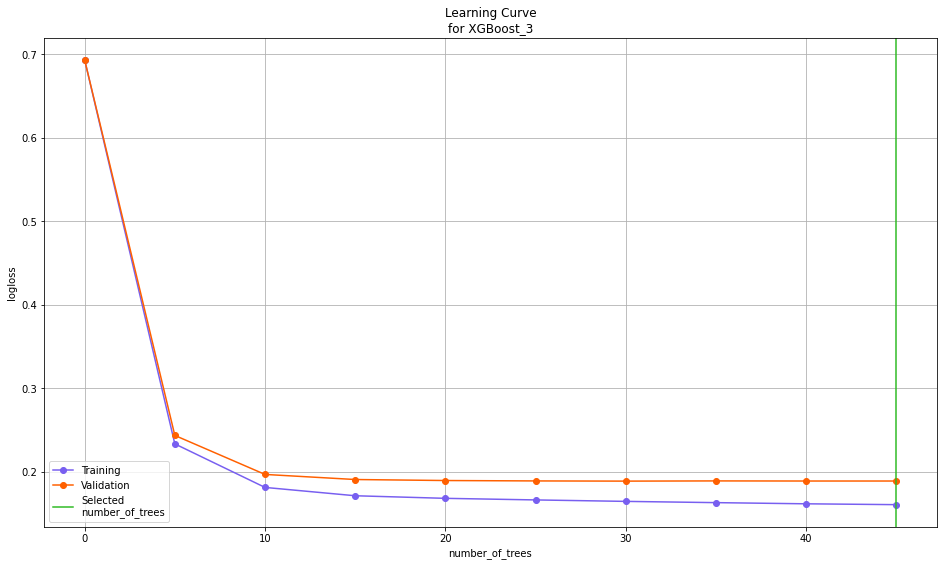

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

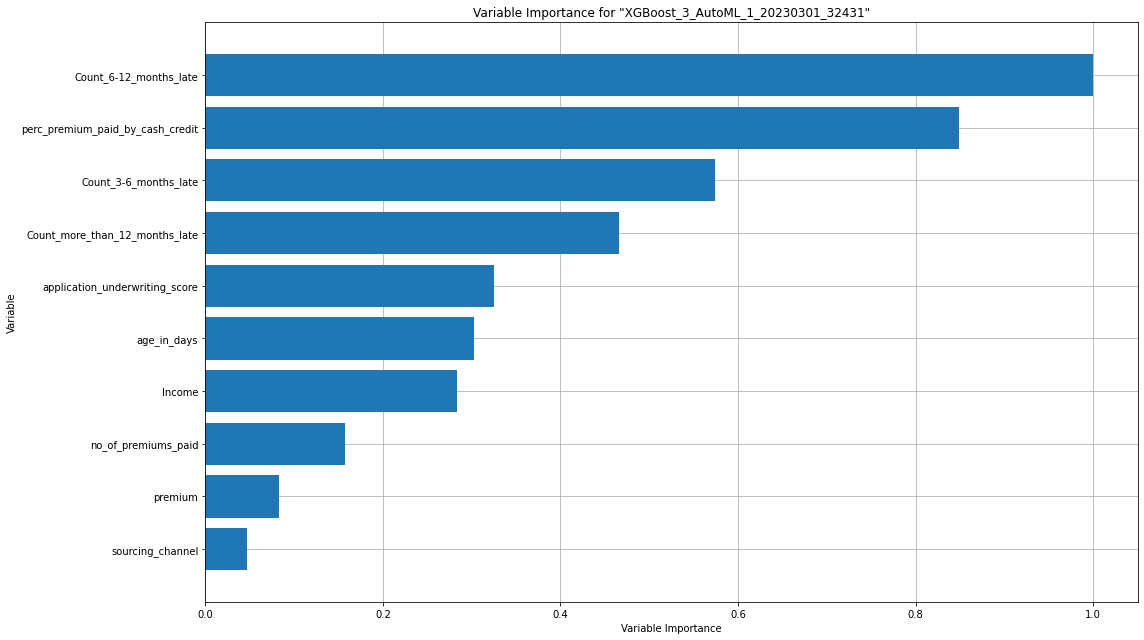

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

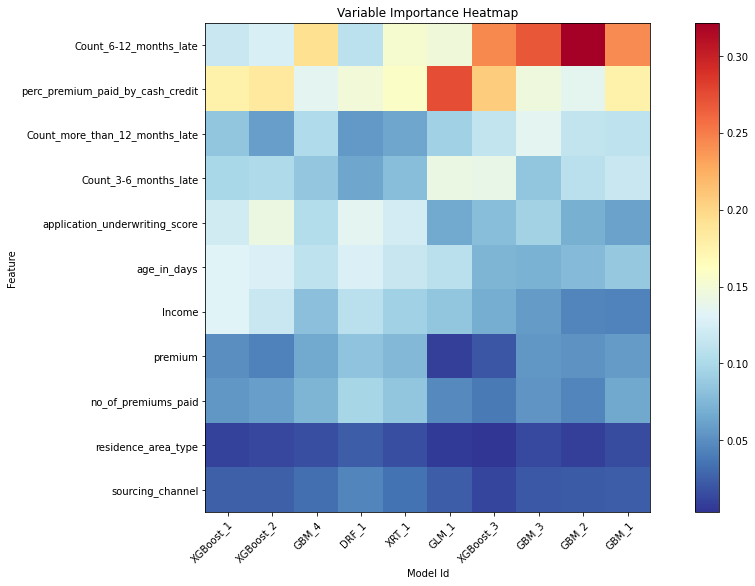

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

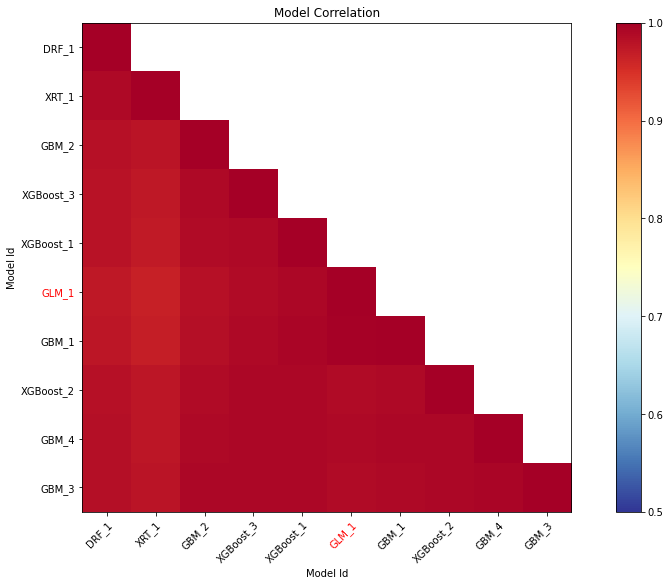

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

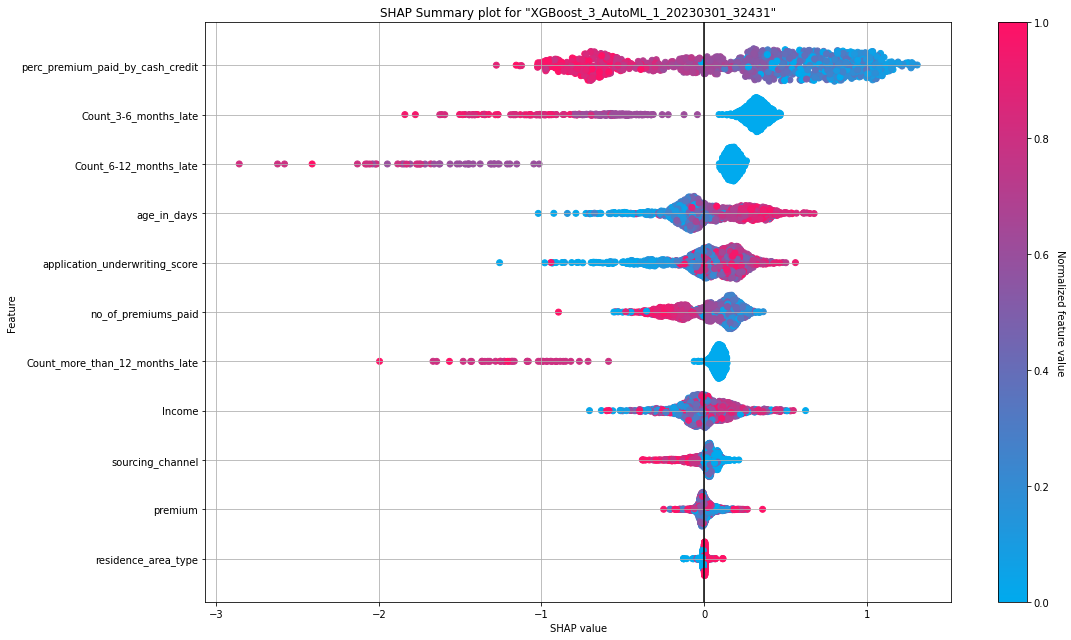

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

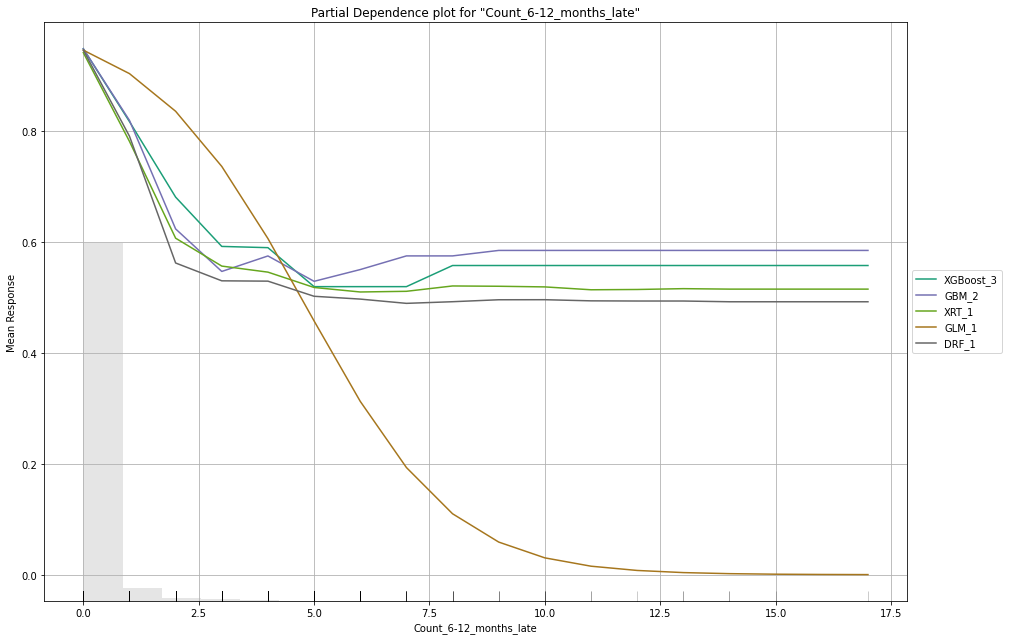

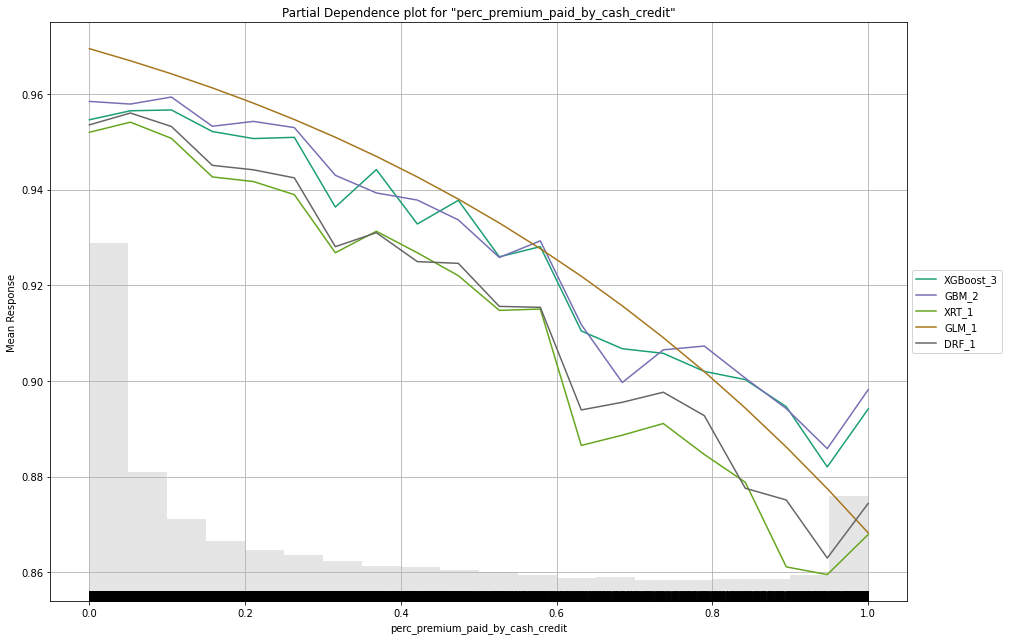

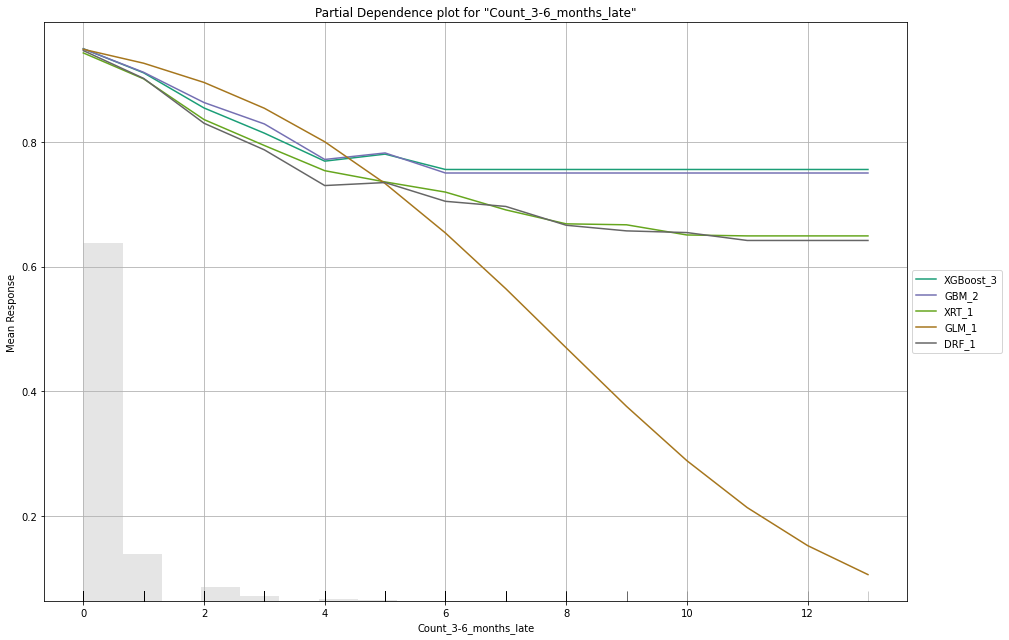

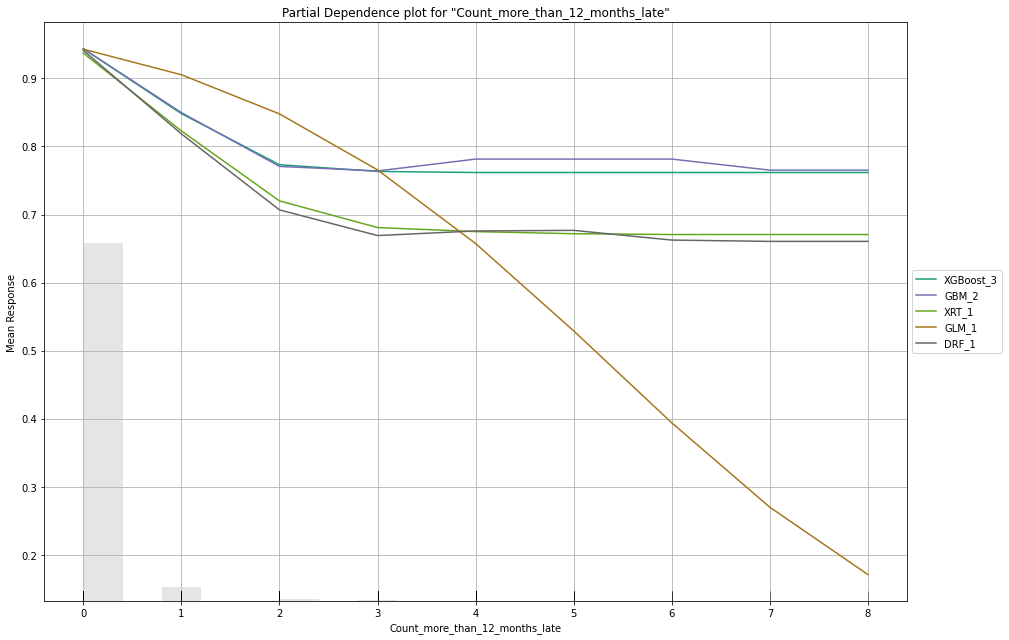

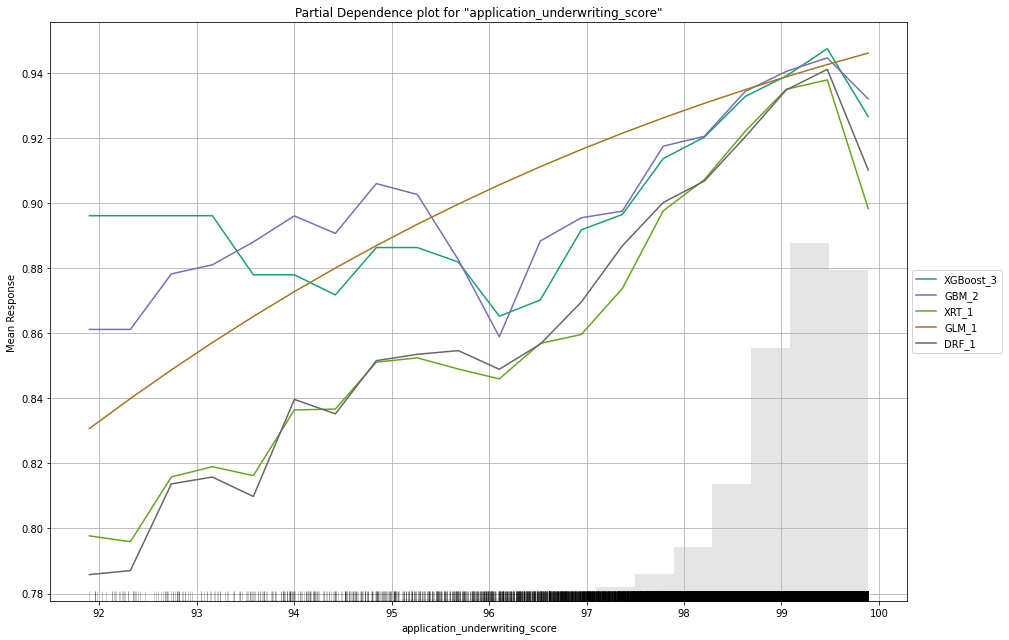



H2OExplanation([('leaderboard', H2OExplanation([('header', <h2o.explanation._explain.Header object at 0x7fcaf28a9d00>), ('description', <h2o.explanation._explain.Description object at 0x7fcb3d45d970>), ('data', H2OFrame({'_ex': <Expr(makeLeaderboard ['XGBoost_3_AutoML_1_20230301_32431', 'GBM_2_AutoML_1_20230301_32431', 'GBM_1_AutoML_1_20230301_32431', 'GBM_3_AutoML_1_20230301_32431', 'GBM_4_AutoML_1_20230301_32431', 'XGBoost_2_AutoML_1_20230301_32431', 'XRT_1_AutoML_1_20230301_32431', 'GLM_1_AutoML_1_20230301_32431', 'XGBoost_1_AutoML_1_20230301_32431', 'DRF_1_AutoML_1_20230301_32431'] 'py_4_sid_92e8' 'AUTO' 'ALL' 'AUTO')#py_15_sid_92e8>}))])), ('confusion_matrix', H2OExplanation([('header', <h2o.explanation._explain.Header object at 0x7fcaf36e91c0>), ('description', <h2o.explanation._explain.Description object at 0x7fcaf1eea280>), ('subexplanations', H2OExplanation([('XGBoost_3_AutoML_1_20230301_32431', H2OExplanation([('header', <h2o.explanation._explain.Header object at 0x7fcaf1ee

In [19]:
from h2o import explanation
explanation = aml.explain(train_data)
print(explanation)

In [20]:
prediction = aml.leader.predict(X_test)
print(prediction)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
predict             Not Paid On Time    Paid On Time
Not Paid On Time          0.719401          0.280599
Paid On Time              0.142756          0.857244
Paid On Time              0.0575047         0.942495
Paid On Time              0.019308          0.980692
Paid On Time              0.0122905         0.98771
Paid On Time              0.00852048        0.99148
Paid On Time              0.0509323         0.949068
Paid On Time              0.0177814         0.982219
Paid On Time              0.0202277         0.979772
Paid On Time              0.00555545        0.994445
[16029 rows x 3 columns]



In [21]:
#checking the type and length of prediction and y_test
prediction=prediction.as_data_frame()
prediction=prediction['predict'].tolist()
print(type(prediction))
print(len(prediction))

<class 'list'>
16029


In [22]:
y_test=test_data.as_data_frame()
y_test=y_test['target'].tolist()
print(type(y_test))
print(len(y_test))

<class 'list'>
16029


[[  108   904]
 [   82 14935]]


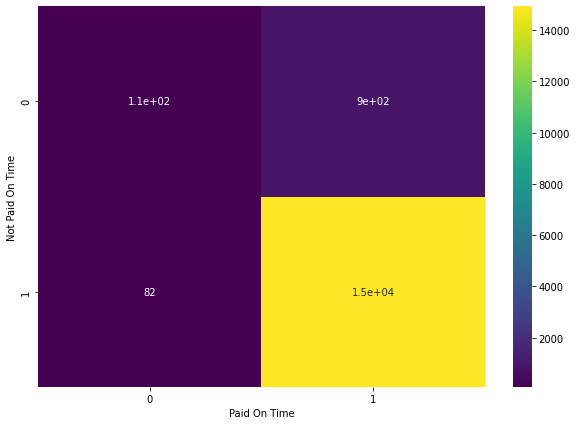

In [23]:
#plotting the confusion matrix to evaluate the prediction results
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True, cmap='viridis')
plt.xlabel('Paid On Time')
plt.ylabel('Not Paid On Time')
print(cm)

In [24]:
#Printing different metrics to verify the model

from sklearn.metrics import accuracy_score, classification_report
report = classification_report(y_test,prediction)
print(report)
acc= accuracy_score(y_test,prediction)
print("Accuracy is: ",acc)

                  precision    recall  f1-score   support

Not Paid On Time       0.57      0.11      0.18      1012
    Paid On Time       0.94      0.99      0.97     15017

        accuracy                           0.94     16029
       macro avg       0.76      0.55      0.57     16029
    weighted avg       0.92      0.94      0.92     16029

Accuracy is:  0.9384864932310187


In [25]:
#Remove nan and infinte data and converting h20 frame into data frame

df_train_pd = train_data.as_data_frame()  
df_test_pd = test_data.as_data_frame()
df_train_pd = df_train_pd[~df_train_pd.isin([np.nan, np.inf, -np.inf]).any(1)]
df_test_pd = df_test_pd[~df_test_pd.isin([np.nan, np.inf, -np.inf]).any(1)]

In [26]:
#Defining X and y variables

y_train_pd = df_train_pd.iloc[:,-1]
y_test_pd = df_test_pd.iloc[:,-1]


X_train_pd = df_train_pd[df_train_pd.columns[df_train_pd.columns != 'target']]
X_train_pd.drop('id', axis=1, inplace=True)
X_test_pd = df_test_pd[df_test_pd.columns[df_test_pd.columns != 'target']]
X_test_pd.drop('id', axis=1, inplace=True)

In [27]:
#Encoding categorical columns into numerical

le = LabelEncoder()
y_train_pd = le.fit_transform(y_train_pd)
y_train_pd = pd.DataFrame(y_train_pd, columns=['target'])

y_test_pd = le.fit_transform(y_test_pd)
y_test_pd = pd.DataFrame(y_test_pd, columns=['target'])

X_train_pd = pd.get_dummies(X_train_pd)
X_test_pd = pd.get_dummies(X_test_pd)

train_concatenated = pd.concat([X_train_pd, y_train_pd],axis=1)
X_train_pd_h2o =h2o.H2OFrame(X_train_pd) 
X_test_pd_h2o = h2o.H2OFrame(X_test_pd) 
X_train_pd_h2o_columns=X_train_pd_h2o.columns
train_concatenated_h2o = h2o.H2OFrame(train_concatenated) 

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# *Questionnaire*

### 1. Is the relationship significant?
To check if the relationship is signinficant, we'll use OLS regression to check the p-value.

 p-value less than 0.05 means we can ignore the null hypothesis and the relationship is highly significant.

In [28]:
import statsmodels.api as sm

dependent_var =y_train_pd['target'] 

independent_vars = X_train_pd[['perc_premium_paid_by_cash_credit', 'age_in_days', 'Income', 'Count_3-6_months_late', 
                              'Count_6-12_months_late','Count_more_than_12_months_late', 'application_underwriting_score', 
                               'no_of_premiums_paid', 'premium']].reset_index(drop=True)

# Fitting the OLS model
model = sm.OLS(dependent_var, independent_vars).fit()
p_values = model.summary2().tables[1]['P>|t|']
print(p_values.round(4))

perc_premium_paid_by_cash_credit    0.0000
age_in_days                         0.0000
Income                              0.4306
Count_3-6_months_late               0.0000
Count_6-12_months_late              0.0000
Count_more_than_12_months_late      0.0000
application_underwriting_score      0.0000
no_of_premiums_paid                 0.0018
premium                             0.0113
Name: P>|t|, dtype: float64


Except for Income, all others have p-value less than 0.05, which means they all significant features

### Q2. Are any model assumptions violated?

Best model is based on XGBoost (eXtreme Gradient Boosting) which is based on the gradient boosting algorithm, which is an ensemble learning method that combines multiple weak models to create a strong model.

Citing: https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/xgboost.html

Following are some assumptions:
1. Linearity: XGBoost assumes that the relationship between the predictors and the response variable is linear. This means that the model may not perform well if there are complex nonlinear relationships between the predictors and the response variable.

2. Independence: XGBoost assumes that the observations in the dataset are independent of each other. If there is any correlation between observations, the model may overestimate the importance of certain features or underestimate the variability of the response variable.

3. No multicollinearity: XGBoost assumes that there is no multicollinearity among the predictor variables. This means that the predictors should not be highly correlated with each other, as this can cause instability in the model and lead to unreliable estimates of feature importance.

4. Normally distributed residuals: XGBoost assumes that the residuals (i.e., the differences between the predicted and actual values) are normally distributed. If the residuals are not normally distributed, this may indicate that the model is not capturing all of the relevant information in the data.

Except 3rd, none of the assumptions are violated. We can see from the sns plot that there is collinearity between features, from corelation matrix we can see that the variables are independent 

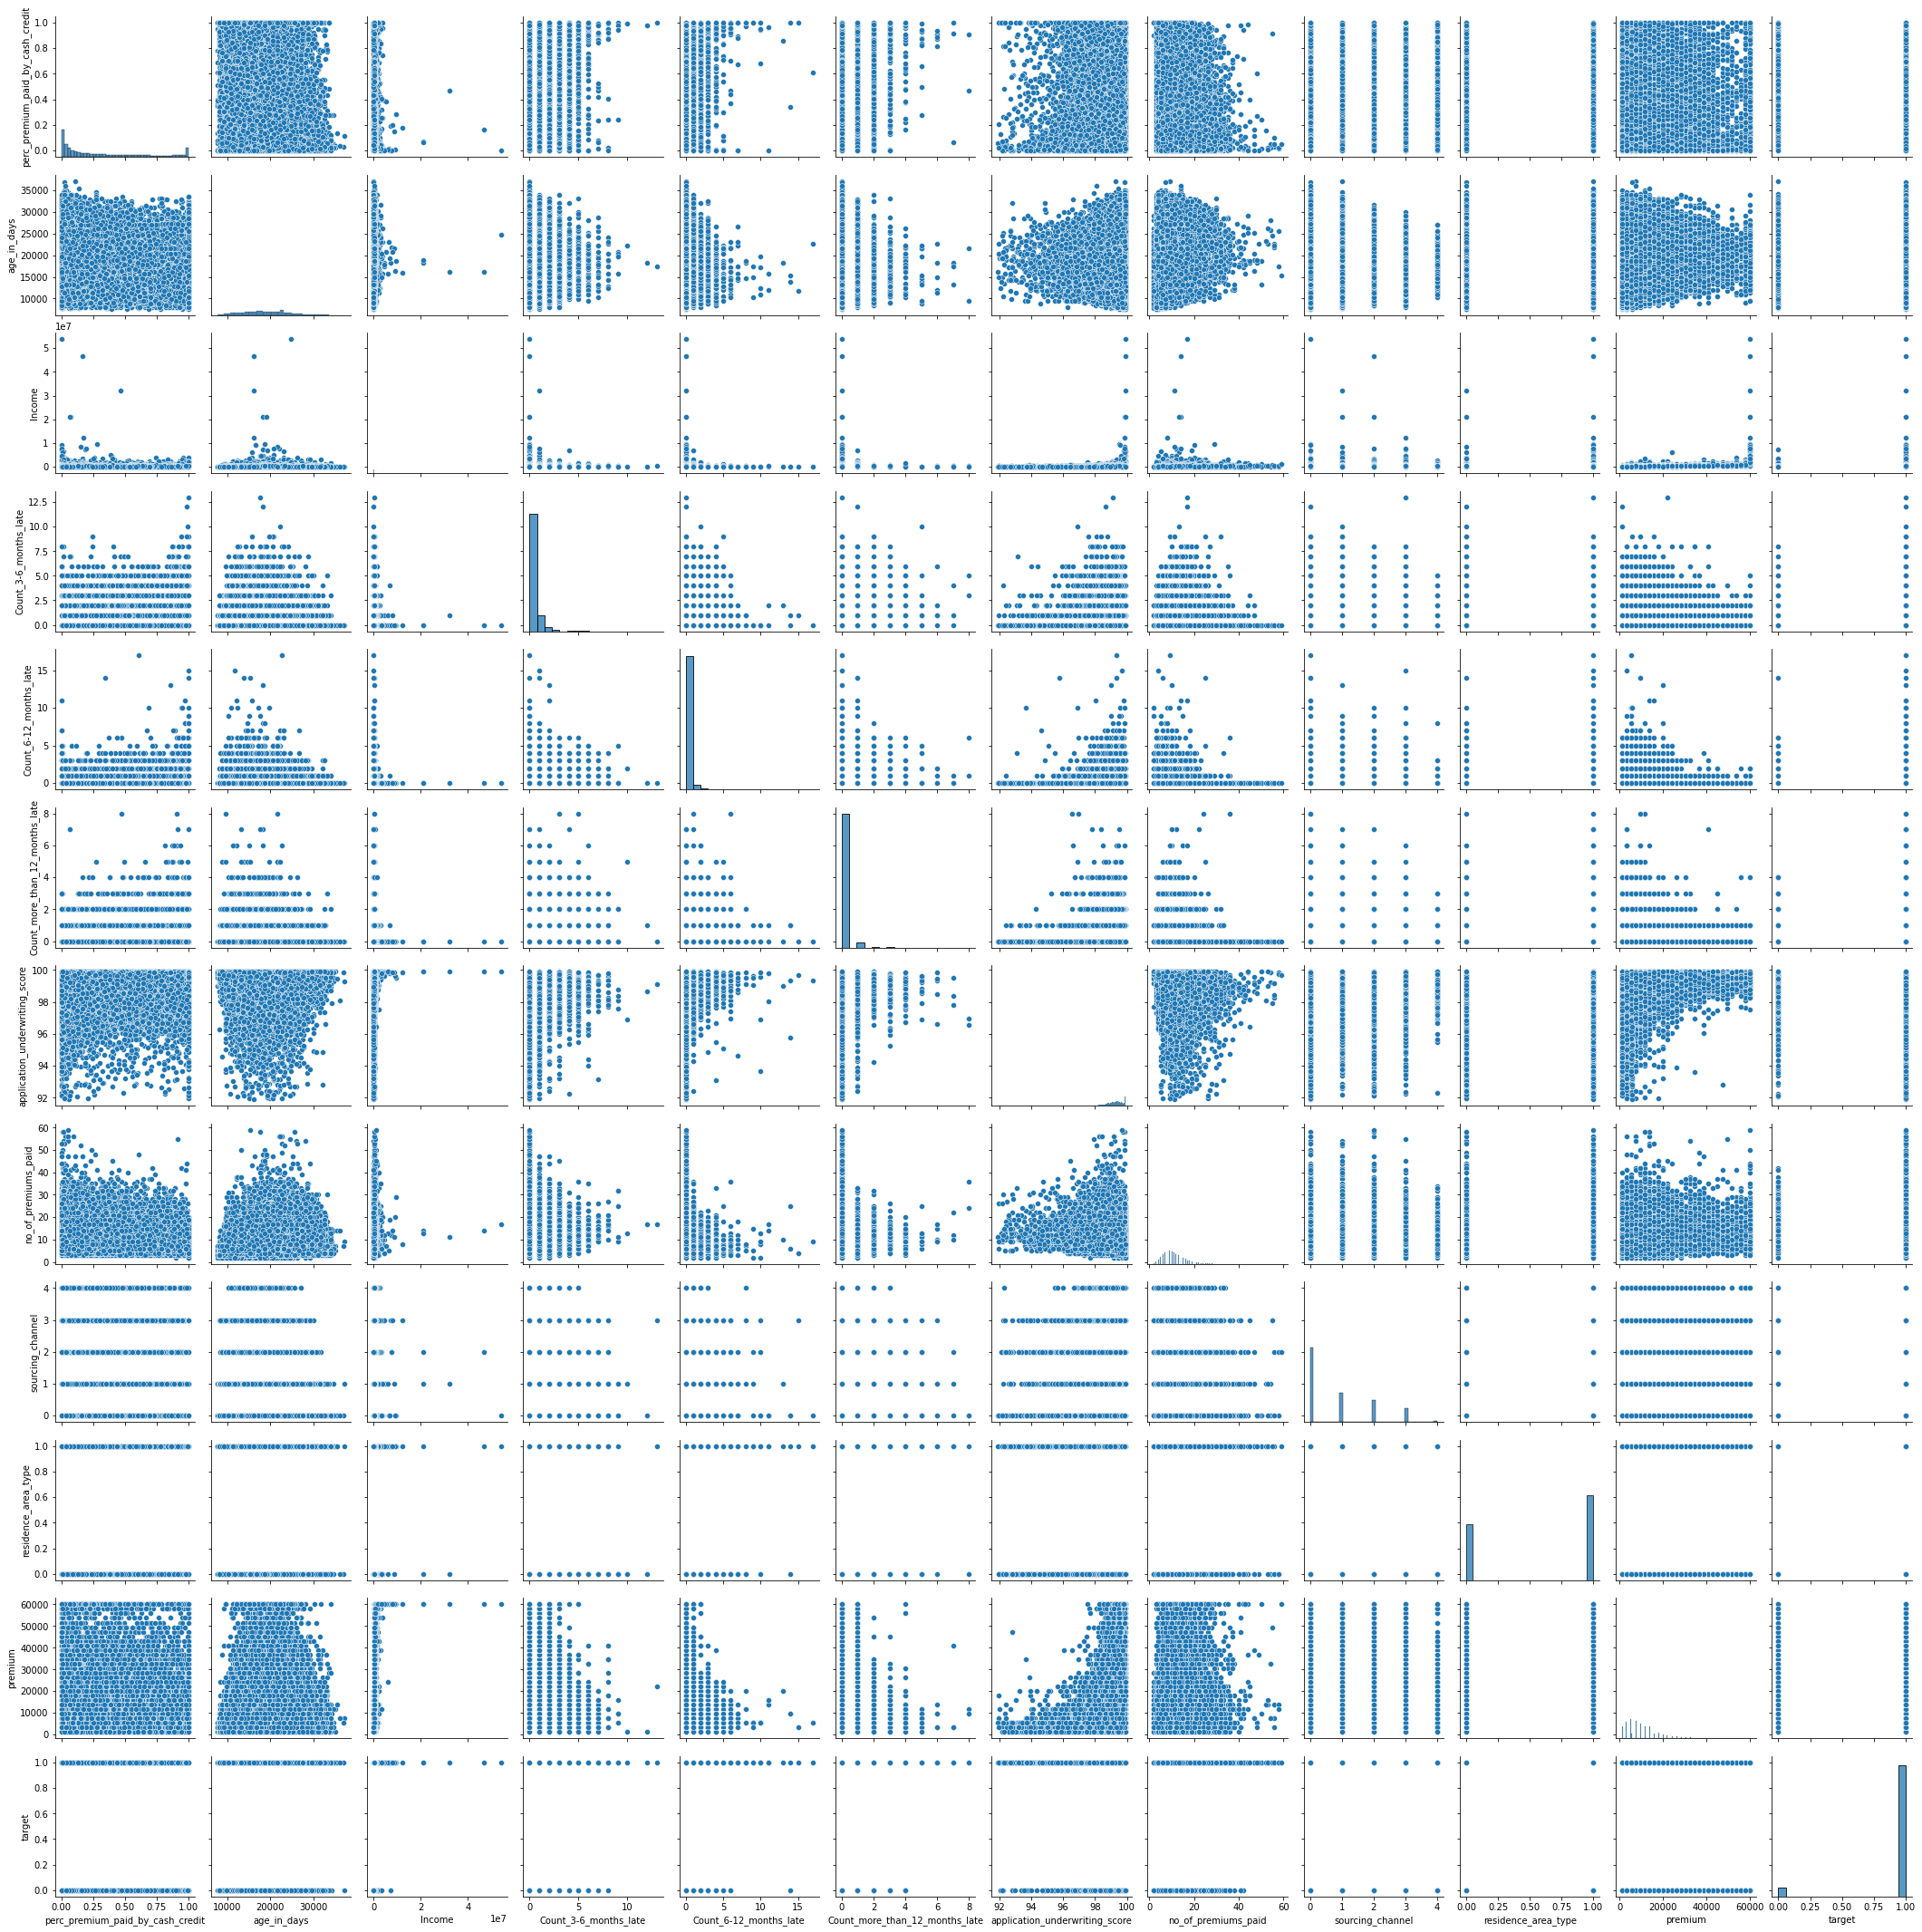

In [29]:
train_concatenated = train_concatenated.dropna(axis=0, how='any', subset=None, inplace=False)
sns.pairplot(train_concatenated)

### Q3 Is there any multicollinearity in the model?
Yes, from the VIF data, we could know that some variables have correlationships with each other, as maybe they are related to the same subject

In [30]:
X_variables =X_train_pd[['perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score', 'no_of_premiums_paid', 
       'premium']]
numColumns = X_train_pd.select_dtypes("number").columns

#print(numColumns)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]
print(vif_data)

                            feature        VIF
0  perc_premium_paid_by_cash_credit   2.223302
1                       age_in_days  15.955763
2                            Income   1.478091
3             Count_3-6_months_late   1.316322
4            Count_6-12_months_late   1.170757
5    Count_more_than_12_months_late   1.205485
6    application_underwriting_score  21.671026
7               no_of_premiums_paid   6.180457
8                           premium   2.808223


### Q4 In the multivariate models are predictor variables independent of all the other predictor variables?

To check this, we will plot the corelation matrix.
We can see that the predictor variables have different corelation with target variable, hence independent

<AxesSubplot:>

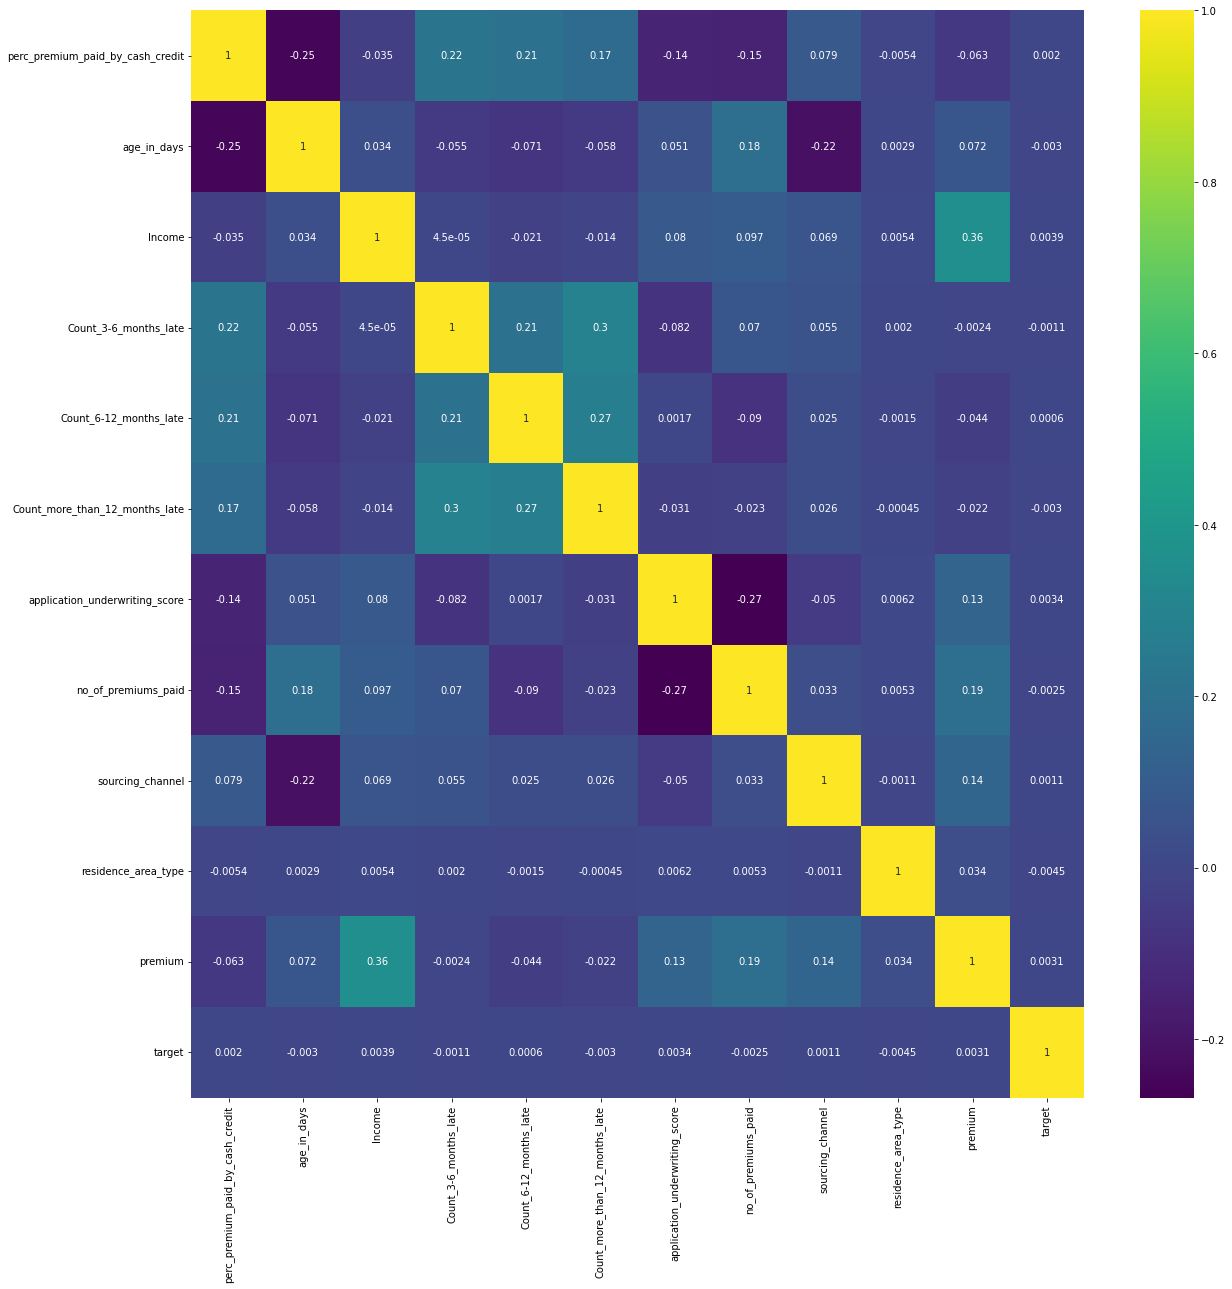

In [31]:
corr_premium = train_concatenated.corr()
top_corr_features = corr_premium.index
plt.figure(figsize=(20,20))

sns.heatmap(train_concatenated[top_corr_features].corr(),annot=True, cmap='viridis')

We can also check by plotting sns pairplot, there is collinearity between features

<Figure size 576x360 with 0 Axes>

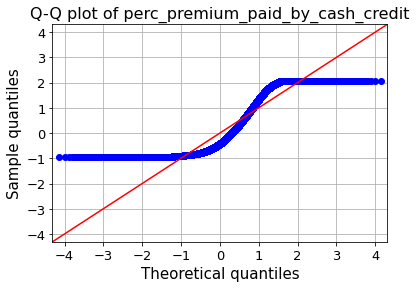

<Figure size 576x360 with 0 Axes>

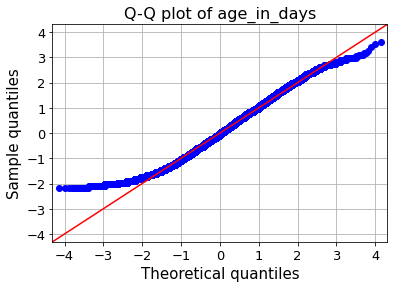

<Figure size 576x360 with 0 Axes>

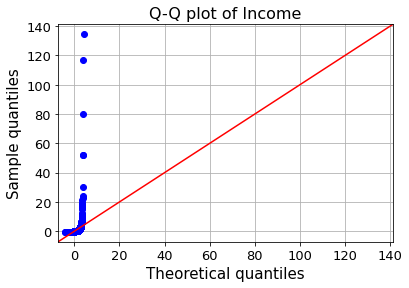

<Figure size 576x360 with 0 Axes>

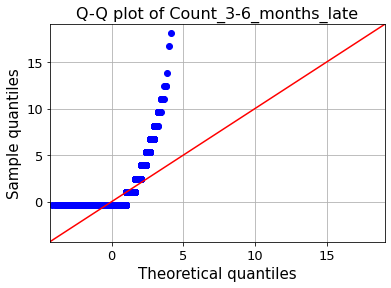

<Figure size 576x360 with 0 Axes>

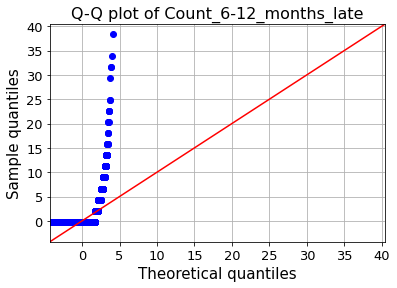

<Figure size 576x360 with 0 Axes>

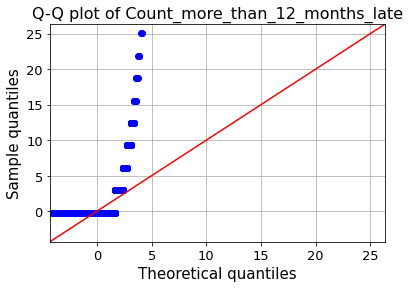

<Figure size 576x360 with 0 Axes>

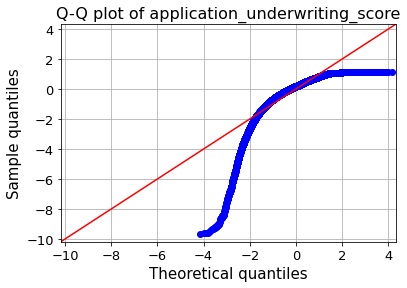

<Figure size 576x360 with 0 Axes>

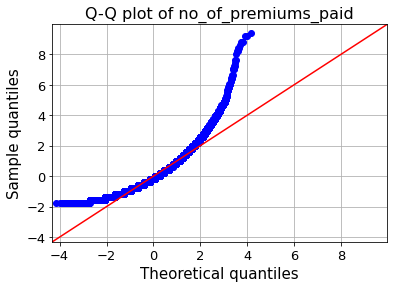

<Figure size 576x360 with 0 Axes>

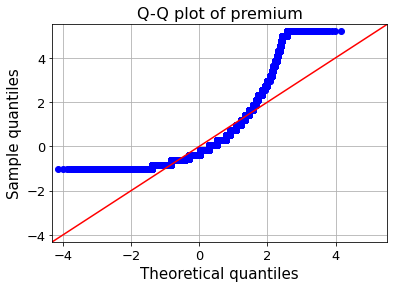

In [32]:
train_concatenated = train_concatenated.dropna(axis=0, how='any', subset=None, inplace=False)

from statsmodels.graphics.gofplots import qqplot
data_norm = train_concatenated[['perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score', 'no_of_premiums_paid', 
       'premium']]

for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

### Q5. In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

Ans - By looking at the below graph we see "Count_6-12_months_late" is the most importance and "sourcing channel" is the least importance

By looking at the below graph we see that the order being

* Count_6-12_months_late
* perc_premium_paid_by_cash_credit
* Count_3-6_months_late
* Count_more_than_12_months_late
* application_underwriting_score
* age_in_days
* Income
* no_of_premiums_paid
* premium
* sourcing channel

In any variable importance graph we have a scale in the range from 0 to 1 where 1 being the most significant predictor and 0 being the least. We see that Count_6-12_months_late being scaled at 1 as it is very important while perc_premium_paid_by_cash_credit scaled at around 0.8 being the second most important significant. Premium and sourcing channel being the least important.    

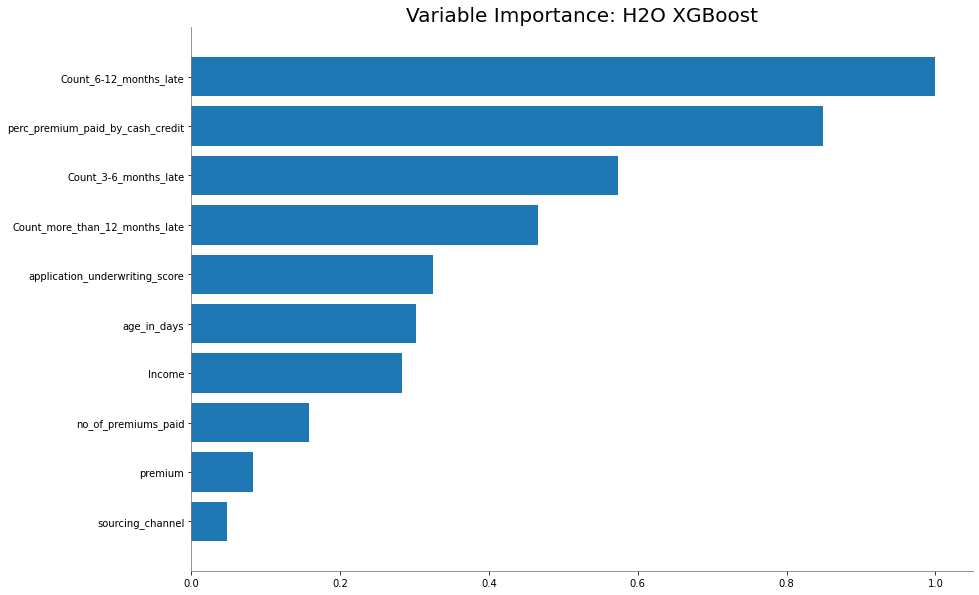

<Figure size 432x288 with 0 Axes>

In [33]:
%matplotlib inline
best_model.varimp_plot()

### Q6 Does the model make sense

Yes, the model makes quite sense to me.

Late payment of premiums can be an indicator of financial distress or instability of the policyholder. If a policyholder is struggling to pay their premiums on time, it may suggest that they are at a higher risk of defaulting on their policy or making a claim in the future.

Including the feature "premium paid by cash or credit card" in a machine learning model can help insurers or financial institutions make more accurate risk assessments, detect potential cases of fraud, and offer personalized services and products to customers.

Sourcing channel can be helpful in understanding how customers are acquired, it is generally considered a less important feature in machine learning models for insurance policies due to Lack of variation, Data quality etc.

Though, Sourcing channel in insurance machine learning models provides valuable insights when combined with other factors, but alone may not impact the model's accuracy or usefulness.

In [34]:
print(aml.leader)
r2 = aml.leader.r2(valid=True)
print("*"*10)
print(f"r2 value is {r2}")

Model Details
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_1_20230301_32431


Model Summary: 
    number_of_trees
--  -----------------
    45

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.0433954785058078
RMSE: 0.20831581434400942
LogLoss: 0.1607323272880633
Mean Per-Class Error: 0.3853701546293429
AUC: 0.8775026792482257
AUCPR: 0.9893611880498727
Gini: 0.7550053584964513

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5296824760735035
                  Not Paid On Time    Paid On Time    Error    Rate
----------------  ------------------  --------------  -------  ----------------
Not Paid On Time  839                 2717            0.7641   (2717.0/3556.0)
Paid On Time      359                 53387           0.0067   (359.0/53746.0)
Total             1198                56104           0.0537   (3076.0/57302.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
--------

### Q7. Does regularization help?

Here, we are regularizing XG Boost model using L1 regularization (also known as Lasso regularization) and L2 regularization (also known as Ridge regularization)

In [35]:
# Set the response column
y = 'target'
X_las = train_data.drop('id')
X_las = X_las.drop(y)
X_las=X_las.col_names

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.45900243149342346
                  Not Paid On Time    Paid On Time    Error    Rate
----------------  ------------------  --------------  -------  ---------------
Not Paid On Time  102                 910             0.8992   (910.0/1012.0)
Paid On Time      58                  14959           0.0039   (58.0/15017.0)
Total             160                 15869           0.0604   (968.0/16029.0)
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.45900243149342346
                  Not Paid On Time    Paid On Time    Error    Rate
----------------  ------------------  --------------  -------  ---------------
Not Paid On Time  102                 910             0.8992   (910.0/1012.0)
Paid On Time      58                  14959           0.0

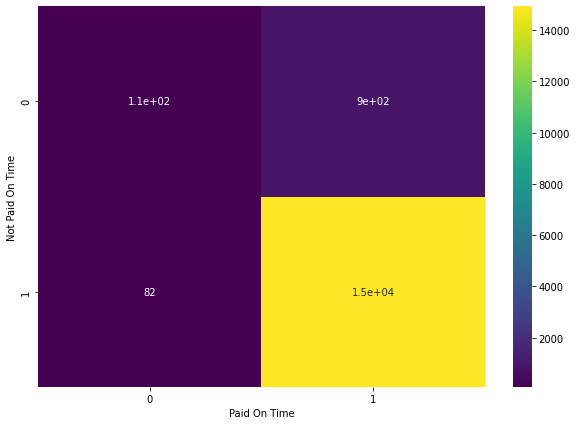

In [36]:
#Train Lasso model
lasso_model = h2o.estimators.glm.H2OGeneralizedLinearEstimator(
    family="binomial",
    alpha=1.0,  # Set alpha to 1 for L1 regularization (Lasso)
    lambda_search=True,  # Perform lambda search to automatically determine best lambda
    nfolds=5,  # Use 5-fold cross-validation for model evaluation
    keep_cross_validation_predictions=True,  # Keep cross-validation predictions for stacking
    fold_assignment="Modulo"  # Use modulo assignment for cross-validation
)

lasso_model.train(
    x=X_las,
    y=y,
    training_frame=train_data,
    validation_frame=test_data,
    max_runtime_secs=600,  # Set a maximum runtime of 10 minutes for the model to train
)


# Make predictions on validation set
lasso_predictions = lasso_model.predict(test_data)
performance = lasso_model.model_performance(test_data)
confusion_matrix = performance.confusion_matrix().table
print(confusion_matrix)
# Print model performance on validation set
#print(lasso_predictions)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True, cmap='viridis')
plt.xlabel('Paid On Time')
plt.ylabel('Not Paid On Time')
print(confusion_matrix)

In [37]:
a=test_data[y].as_data_frame().values.tolist()
b=lasso_predictions['predict'].as_data_frame().values.tolist()

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(a,b)

accuracy = (cm[0,0] + cm[1,1]) / cm.sum()
print(accuracy)

0.9395470709339322


In [38]:
ridge_model = h2o.estimators.glm.H2OGeneralizedLinearEstimator(
    family="binomial",
    alpha=0.0,  # Set alpha to 0 for L2 regularization (Ridge)
    lambda_search=True,  # Perform lambda search to automatically determine best lambda
    nfolds=5,  # Use 5-fold cross-validation for model evaluation
    keep_cross_validation_predictions=True,  # Keep cross-validation predictions for stacking
    fold_assignment="Modulo"  # Use modulo assignment for cross-validation
)

ridge_model.train(
    x=X_las,
    y=y,
    training_frame=train_data,
    validation_frame=test_data,
    max_runtime_secs=600,  # Set a maximum runtime of 10 minutes for the model to train
)

# Make predictions on test set
ridge_predictions = ridge_model.predict(test_data)
performance1 = ridge_model.model_performance(test_data)
confusion_matrix1 = performance.confusion_matrix().table
print(confusion_matrix1)

#Print model performance on test set
#print(ridge_predictions)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.45900243149342346
                  Not Paid On Time    Paid On Time    Error    Rate
----------------  ------------------  --------------  -------  ---------------
Not Paid On Time  102                 910             0.8992   (910.0/1012.0)
Paid On Time      58                  14959           0.0039   (58.0/15017.0)
Total             160                 15869           0.0604   (968.0/16029.0)


In [39]:
a1=test_data[y].as_data_frame().values.tolist()
b1=ridge_predictions['predict'].as_data_frame().values.tolist()
print(a)
print(b)
cm1 = confusion_matrix(a1,b1)
accuracy1 = (cm1[0,0] + cm1[1,1]) / cm1.sum()
print(accuracy1)

[['Not Paid On Time'], ['Not Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Not Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Not Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Not Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Paid On Time'], ['Paid 

### Q8. Which independent variables are significant?


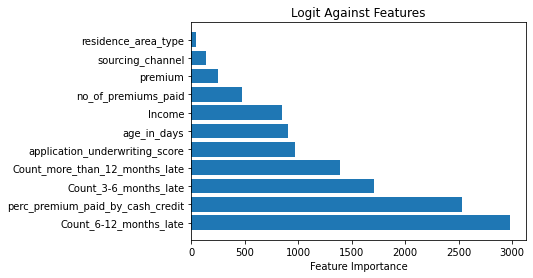

In [40]:
import matplotlib.pyplot as plt

best_model = aml.leader
feature_importance = best_model.varimp()
plt.barh(range(len(feature_importance)), [val[1] for val in feature_importance], align='center')
plt.yticks(range(len(feature_importance)), [val[0] for val in feature_importance])
plt.xlabel('Feature Importance')
plt.title('Logit Against Features')
plt.show()

### Q9. Which hyperparameters are important?

Our best model is XGBoost, so we will create a XGBoost classifier model and fit the data in it to find the hypeparameters


All hyperparameters below are important in controlling the behavior and performance of the XGBoost model.

* n_estimator - specifies the no of trees to build in the ensemble
* max_depth - to control the maxium depth of each tree
* learning_rate - to control the step size at each iteration
* subsample - to randomly sample 80% of the training data for each tree
* colsample_bytree - to randomly select 80% of the features for each tree
* objective - to specify that we are training a binary classification model
* eval_metric -  use logarithmic loss as the evaluation metric





In [41]:
import xgboost as xgb

#Set the hyperparameters for XGBoost
params = {
    'n_estimators': 100,
    'max_depth': 3,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

#Create an XGBoost classifier and train it on the training set
xgb_model = xgb.XGBClassifier(**params)
xgb_model.fit(X_train_pd, y_train_pd)

#Evaluate the trained model on the testing set
score = xgb_model.score(X_test_pd, y_test_pd)
print("Accuracy score: {:.2f}".format(score))


Accuracy score: 0.94


## License 

MIT License

Copyright (c) 2023 Charmi Parmar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

References
*   https://towardsdatascience.com/a-deep-dive-into-h2os-automl-4b1fe51d3f3e
*   https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html
* H20.ai- https://docs.h2o.ai/
* OLS Model- http://net-informations.com/ds/mla/ols.html
* Professor's AutoML Notebook- https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Basics_InnerWorkings_Interpretations.ipynb
*   Pandas Documentation - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
*   Sklearn Documentation - https://scikit-learn.org/stable/modules/preprocessing.html
*   Dealing with Missing values in Python - https://pandas.pydata.org/docs/user_guide/missing_data.html